In [60]:
import matplotlib.pyplot as plt
import os
from PIL import Image,ImageFilter
import numpy as np

%matplotlib inline

In [62]:
def load_image(file_path):
    if file_path is None or file_path == '':
        return None

    try:
        im = Image.open(file_path)
    except Exception as ex:
        print(ex)
    
    return im   

def load_images(path):
    images = []
    
    for file in sorted(os.listdir(path)):
        file_path = os.path.join(path, file)
        im = load_image(file_path)
        images.append(im)
    
    return images 

In [63]:
def view_image(image):
#     plt.figure("Image") # 图像窗口名称
    plt.imshow(image)
#     plt.axis('on') # 关掉坐标轴为 off
#     plt.title('image') # 图像题目
    plt.show()
    
def view_images(images):
    cols = len(images) if len(images) < 10 else 10
    fig, axes = plt.subplots(figsize=(20,20), nrows=1, ncols=cols, sharey=True, sharex=True)
    for i, ax in enumerate(axes.flatten()):
#         ax.xaxis.set_visible(False)
#         ax.yaxis.set_visible(False)      
        im = ax.imshow(images[i])

In [64]:
def load_smaple():
    path = os.path.join(sample_path, 'dogs')
    samples = load_images(path)
    return [im.resize((224,224)) for im in samples]

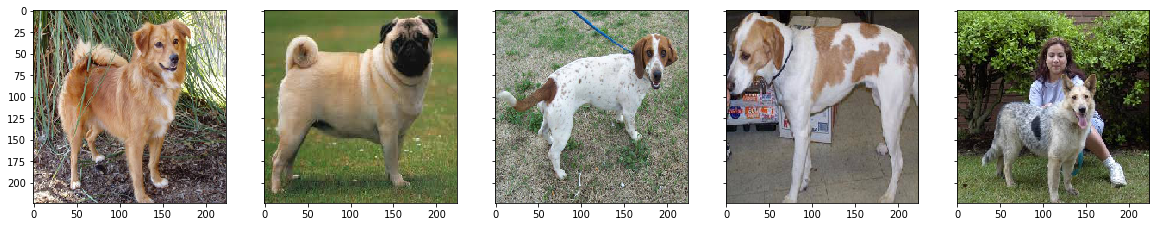

In [65]:
images = load_smaple()
view_images(images)

In [66]:
img = images[0]
print(type(img))
print(img.size)  #图片的尺寸
print(img.mode)  #图片的模式
print(img.format)  #图片的格式
print(img.getpixel((0,0))) #得到像素：

<class 'PIL.Image.Image'>
(224, 224)
RGB
None
(62, 95, 14)


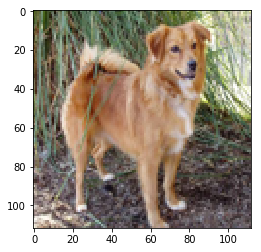

In [67]:
im = images[0]
im.thumbnail((w//2, h//2))
view_image(im)

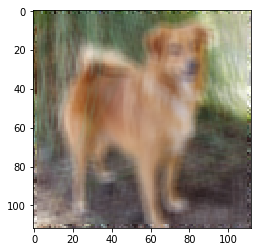

In [68]:
im = images[0]
im2 = im.filter(ImageFilter.BLUR)
view_image(im2)

In [70]:
img = images[1]
# 获取图像的灰度值范围
width = img.size[0]
height = img.size[1]

# 输出图片的像素值
count = 0 
for i in range(0, width):
    for j in range(0, height):
        if img.getpixel((i, j))[0]>=0 and img.getpixel((i, j))[0]<=255:
            count +=1
print (count)
print(height*width)

50176
50176


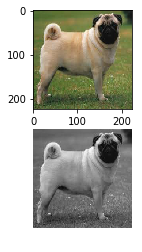

In [75]:
img = images[1]
gray=img.convert('L')
fig, axes = plt.subplots(1, 2)

plt.subplot(211)
plt.imshow(img)

plt.subplot(212)
plt.imshow(gray,cmap='gray')

plt.axis('off')
plt.show()

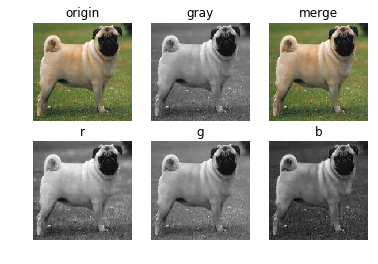

In [76]:
img = images[1]
gray=img.convert('L')   #转换成灰度

r,g,b=img.split()   #分离三通道
pic=Image.merge('RGB',(r,g,b)) #合并三通道

plt.figure("beauty")
plt.subplot(2,3,1), plt.title('origin')
plt.imshow(img),plt.axis('off')
plt.subplot(2,3,2), plt.title('gray')
plt.imshow(gray,cmap='gray'),plt.axis('off')
plt.subplot(2,3,3), plt.title('merge')
plt.imshow(pic),plt.axis('off')
plt.subplot(2,3,4), plt.title('r')
plt.imshow(r,cmap='gray'),plt.axis('off')
plt.subplot(2,3,5), plt.title('g')
plt.imshow(g,cmap='gray'),plt.axis('off')
plt.subplot(2,3,6), plt.title('b')
plt.imshow(b,cmap='gray'),plt.axis('off')
plt.show()